In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('image.png')

In [3]:
def get_contour(image):
    image_blur = cv2.GaussianBlur(image, (19, 19), 0)
    image_saturation = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HLS)[:, :, 2].astype(np.uint8)
    _, binary_image = cv2.threshold(image_saturation, 0, 255, cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(
        image=binary_image, 
        mode=cv2.RETR_EXTERNAL, 
        method=cv2.CHAIN_APPROX_SIMPLE
    )
    return max(contours, key=lambda x: cv2.contourArea(x))

In [4]:
pear_contours = get_contour(image)

In [8]:
x_min, y_min, width, height = cv2.boundingRect(pear_contours)
x_max, y_max = x_min + width, y_min + height

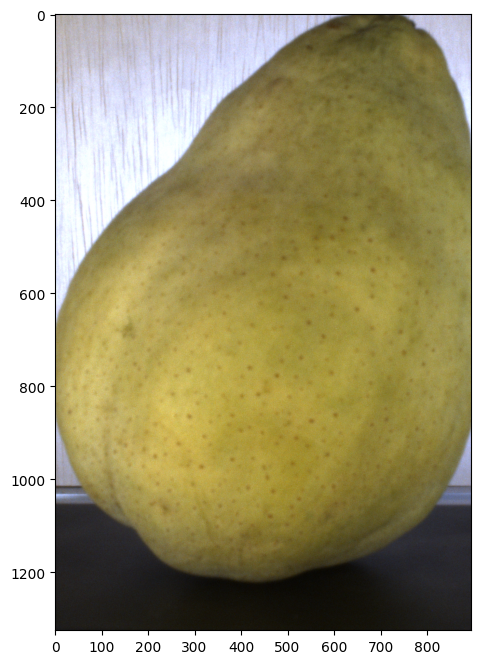

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image[y_min:y_max, x_min:x_max], cv2.COLOR_BGR2RGB))